# **Parameter Optimization of SVM**


##### Name: Manmeet Kaur Sidhu
##### Roll No: 102103478
##### Class 3CO17

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization
from ucimlrepo import fetch_ucirepo

In [11]:
# Fetch dataset
dry_bean = fetch_ucirepo(id=602)

In [12]:
# Data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)


In [13]:
# Define the range of parameters for optimization
kernels = ['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}


In [14]:
# Function to evaluate SVM with given parameters
def evaluate_svm(kernel, nu, tol):
    kernel_name = kernels[int(kernel)]
    model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [15]:
# Perform Bayesian Optimization for multiple samples
results = []
targets = []  
iteration_counts = []  


In [16]:
for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])


|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.5906    | 1.847     | 0.0665    | 0.9877    |
| 2         | 0.3281    | 0.3472    | 0.04203   | 0.09942   |
| 3         | 0.5255    | 0.7853    | 0.02216   | 0.6772    |
| 4         | 0.4297    | 0.3013    | 0.05989   | 0.2513    |
| 5         | 0.2429    | 0.1312    | 0.03687   | 0.9498    |
| 6         | 0.4594    | 1.101     | 0.09727   | 0.7013    |
| 7         | 0.5284    | 1.391     | 0.03839   | 0.935     |
| 8         | 0.3812    | 1.7       | 0.01      | 0.7959    |
| 9         | 0.4283    | 0.9237    | 0.07565   | 0.166     |
| 10        | 0.4789    | 1.825     | 0.07019   | 0.9886    |
| 11        | 0.549     | 1.859     | 0.06501   | 0.9731    |
| 12        | 0.5855    | 1.867     | 0.07982   | 1.0       |
| 13        | 0.3499    | 0.9967    | 0.01394   | 0.8998    |
| 14        | 0.5267    | 1.901     | 0.0644    | 0.9934    |
| 15    

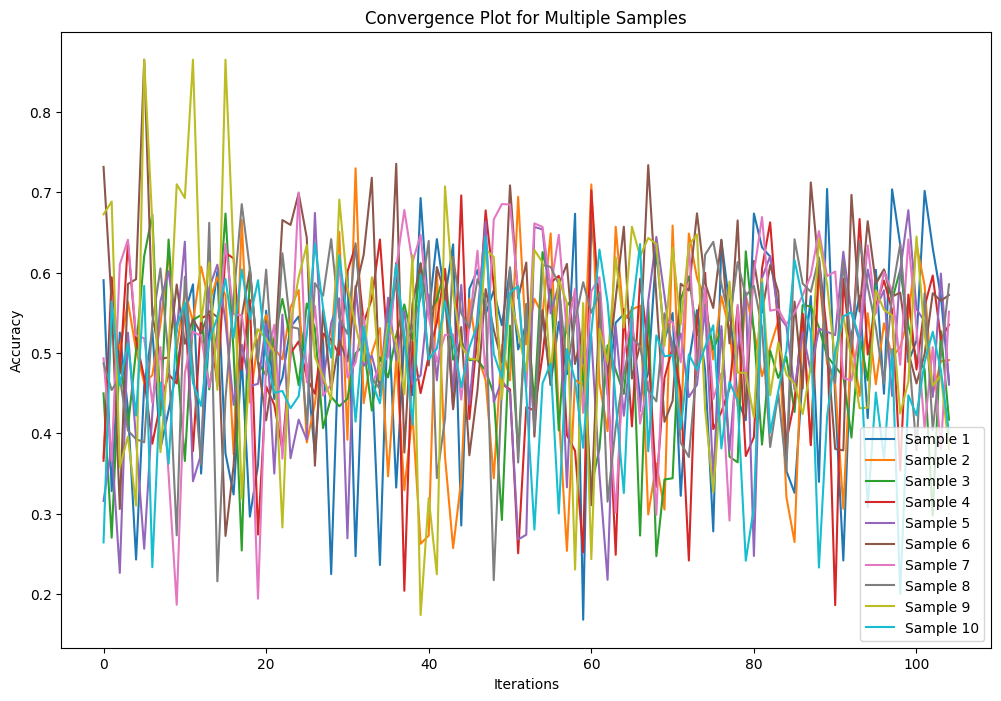

In [17]:
# Visualize convergence plots for each sample
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(range(iteration_counts[i]), targets[i][:iteration_counts[i]], label=f"Sample {i+1}")

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot for Multiple Samples')
plt.legend()
plt.show()

In [18]:
# Create DataFrame to display results
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.704212  {'kernel': 1.458266803397948, 'nu': 0.09750575...
1       1       0.729922  {'kernel': 1.0756753453437267, 'nu': 0.0317105...
2       2       0.673604  {'kernel': 1.1943809243079682, 'nu': 0.0756857...
3       3       0.702498  {'kernel': 1.2728241878238697, 'nu': 0.0454565...
4       4       0.677767  {'kernel': 1.1031638812270488, 'nu': 0.0533039...
5       5       0.865083  {'kernel': 1.690590813675005, 'nu': 0.1, 'tol'...
6       6       0.699804  {'kernel': 1.46024385610858, 'nu': 0.062495059...
7       7       0.685357  {'kernel': 1.6790933234605883, 'nu': 0.0542403...
8       8       0.865083  {'kernel': 1.3707895892738546, 'nu': 0.1, 'tol...
9       9       0.645201  {'kernel': 1.7395181550271748, 'nu': 0.0940714...


In [19]:
# Find sample with maximum accuracy
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"\nSample with maximum accuracy: {max_accuracy_sample['Sample']}")



Sample with maximum accuracy: 5


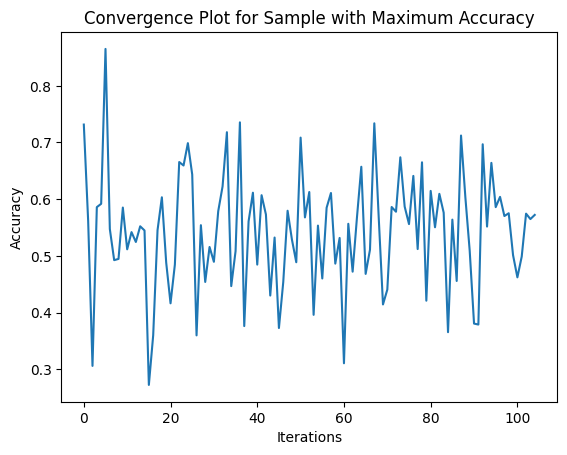

In [20]:
# Plot convergence for sample with maximum accuracy
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
plt.plot(range(iteration_counts[max_accuracy_optimizer_idx]), 
         targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot for Sample with Maximum Accuracy')
plt.show()